In [18]:
import pandas as pd
import os
%matplotlib inline

In [246]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

def plot_results(df, title):
    err = df[['accuracy_std','f1_std']]
    err.columns = ['accuracy','f1']
    ax = df[['accuracy','f1']].plot.barh(y=['accuracy','f1'], xerr=err, figsize=(8,4))
    ax.set_yticklabels(df['type'])
    ax.set_xlim((0,1))
    ax.grid(False)
    ax.legend(loc=(1.04, 0.85))
    ax.set_title(str(title))
    return ax

def plot_feature_results(df, mp_ax, title):
    # Sort the data for easier and consistent comparrison
    df = df.sort_values('order')
    
    err = df[['accuracy_std','f1_std']]
    err.columns = ['accuracy','f1']
    ax = df[['accuracy','f1']].plot.barh(y=['accuracy','f1'], xerr=err, ax=mp_ax)
    ax.set_yticklabels(df['feature_set'])
    ax.set_xlim((0,1))
    ax.set_title(str(title))
    ax.legend().set_visible(False)
    ax.grid(False)
    
    return ax

def plot_ramp_results(df, mp_ax, title):
    # Sort the data for easier and consistent comparrison
    df = df.sort_values('data_size')
    
    err = df[['accuracy_std','f1_std']]
    err.columns = ['accuracy','f1']
    ax = df[['accuracy','f1']].plot.barh(y=['accuracy','f1'], xerr=err, ax=mp_ax)
    ax.set_yticklabels(df['data_size'])
    ax.set_xlim((0,1))
    ax.set_title(str(title))
    ax.legend().set_visible(False)
    ax.grid(False)
    
    return ax

In [215]:
feature_sets = ['ene', 'ele+ene', 'std+eln', 'std+ele+ene', 'std+ene', 'std', 'ele']
order = [2, 6, 5, 7, 4, 1, 3]
feature_order_dict = dict(zip(feature_sets, order))

## Experiment 1:
Binary vs. Vector method

### Baseline Classification Performance

In [228]:
bs_data_path = os.path.join('results','baseline','baseline.csv')
bs_df = pd.read_csv(bs_data_path).drop(['Unnamed: 0'], axis=1).sort_values('accuracy', ascending=False)

In [229]:
bs_df

,type,data_size,accuracy,accuracy_std,f1,f1_std,recall,recall_std,precision,precision_std
2,RandomForestClassifier,871,0.906560,0.042746,0.651643,0.103698,0.509754,0.102604,0.925909,0.126763
3,LogisticRegression,871,0.875922,0.044201,0.617127,0.095667,0.596105,0.105890,0.688355,0.209712
1,SVC,871,0.832889,0.046796,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,DummyClassifier,871,0.832889,0.046796,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0,GaussianNB,871,0.779227,0.050278,0.446031,0.068350,0.544819,0.122744,0.409777,0.131603


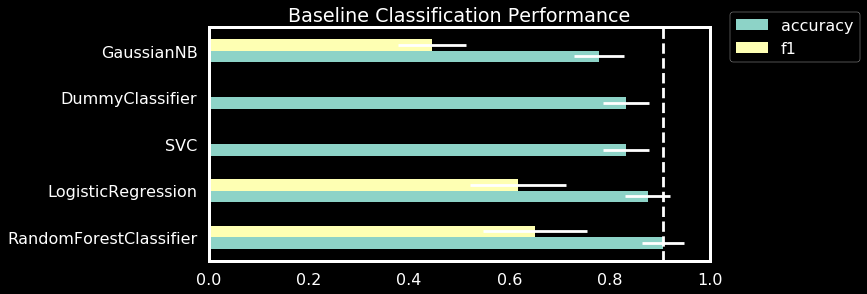

In [230]:
acc_plot = plot_results(bs_df, 'Baseline Classification Performance')
max_base_acc = bs_df['accuracy'].max()
acc_plot.axvline(max_base_acc, linestyle='--')

## Experiment 2: Effects of sampling
Using a sample of 100 compare the model metrics before and after over sampling

In [231]:
e2_data_path = os.path.join('results','oversample','sampled.csv')
e2_df = pd.read_csv(e2_data_path).drop(['Unnamed: 0'], axis=1).sort_values('accuracy', ascending=False)

In [232]:
e2_df

,type,data_size,accuracy,accuracy_std,f1,f1_std,recall,recall_std,precision,precision_std
2,RandomForestClassifier,871,0.979091,0.018341,0.938206,0.042102,0.889858,0.070859,0.994737,0.016644
1,SVC,871,0.975905,0.009440,0.914760,0.049059,0.846211,0.081161,1.000000,0.000000
3,LogisticRegression,871,0.925070,0.028751,0.761741,0.057793,0.713979,0.095999,0.829004,0.071843
4,DummyClassifier,871,0.832889,0.046796,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0,GaussianNB,871,0.806884,0.040829,0.468822,0.063121,0.527819,0.126278,0.477207,0.173177


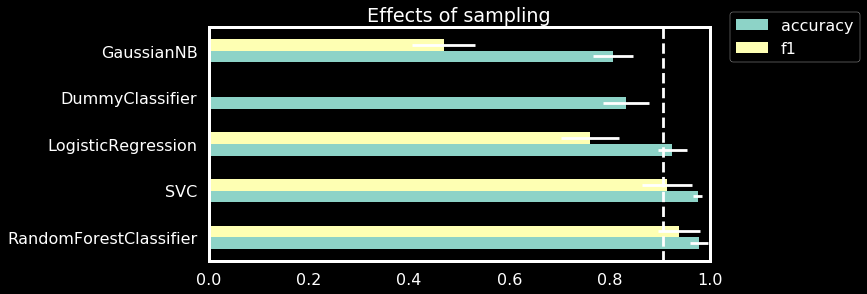

In [233]:
sampling_plot = plot_results(e2_df, 'Effects of sampling')
sampling_plot.axvline(max_base_acc, linestyle='--')

## Experiment 3: Impact of Feature Engineering

In [223]:
e3_data_path = os.path.join('results','features','features.csv')
e3_df = pd.read_csv(e3_data_path).sort_values('accuracy', ascending=False).rename({'Unnamed: 9': 'feature_set'}, axis=1)
e3_df['order'] = e3_df['feature_set'].map(feature_order_dict)
groups = e3_df.groupby('type')

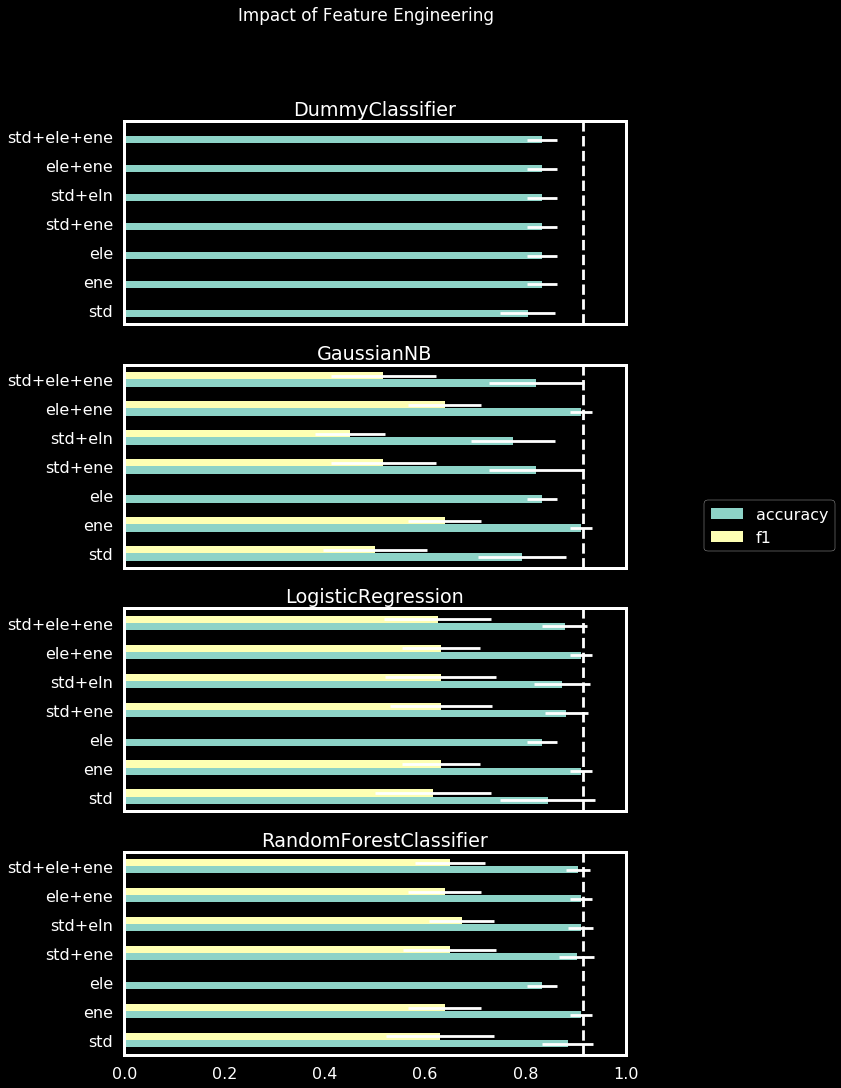

In [227]:
import numpy as np
fig,axs = plt.subplots(4,1, sharex=True, sharey=True, figsize=(8,16))
fig.suptitle('Impact of Feature Engineering')

for model, ax in zip(groups.groups, axs):
    data = groups.get_group(model)
    plot_feature_results(data, ax, model)
    ax.axvline(max_base_acc, linestyle='--')
    
plt.legend(loc = 'lower center', bbox_to_anchor = (0.7,0.5,1,1),
            bbox_transform = plt.gcf().transFigure )    

## Experiment 4: Dataset Size

In [251]:
e4_data_path = os.path.join('results','data_ramp','fixed_amp.csv')
e4_df = pd.read_csv(e4_data_path).drop('Unnamed: 0', axis=1)
groups = e4_df.groupby('type')

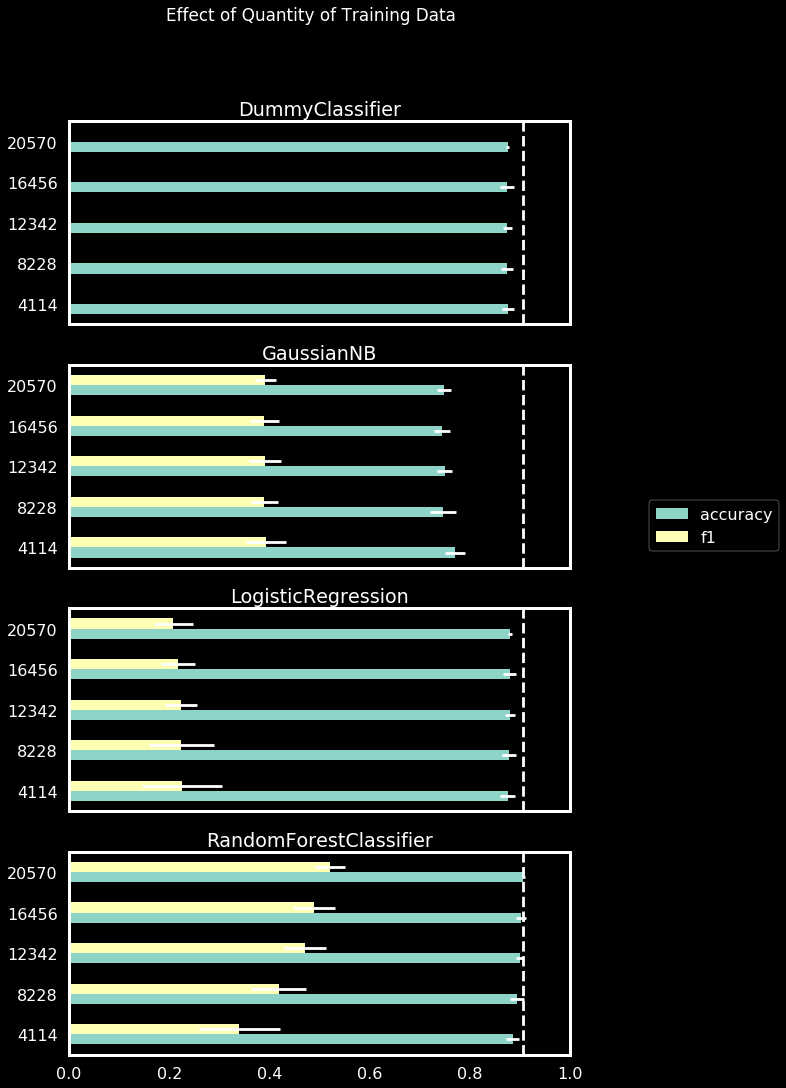

In [253]:
fig,axs = plt.subplots(4,1, sharex=True, sharey=True, figsize=(8,16))
fig.suptitle('Effect of Quantity of Training Data')

for model, ax in zip(groups.groups, axs):
    data = groups.get_group(model)
    plot_ramp_results(data, ax, model)
    ax.axvline(max_base_acc, linestyle='--')
    
plt.legend(loc = 'lower center', bbox_to_anchor = (0.7,0.5,1,1),
            bbox_transform = plt.gcf().transFigure )